In [1]:
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import cv2

%matplotlib inline

(-0.5, 3455.5, 4607.5, -0.5)

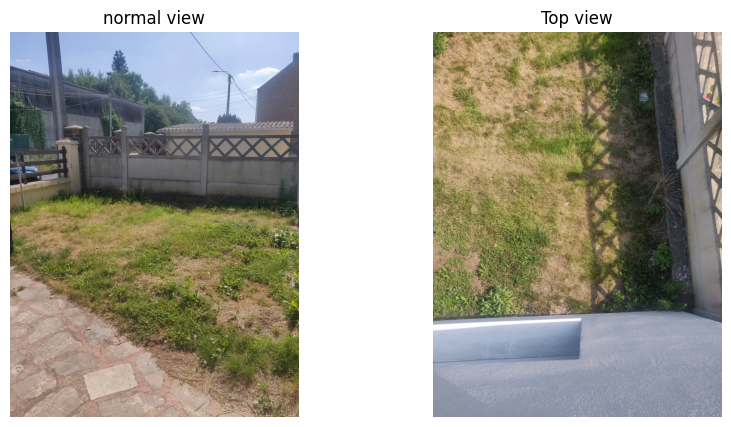

In [2]:
normal_view = Image.open('../../data/IMG_20250711_163748.jpg')
normal_view = normal_view.rotate(-90, expand=True)

top_image_view = Image.open('../../data/IMG_20250711_163552.jpg')
top_image_view = top_image_view.rotate(-90, expand=True)

# Create side-by-side plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.imshow(normal_view)
plt.title("normal view")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(top_image_view)
plt.title("Top view")
plt.axis('off')

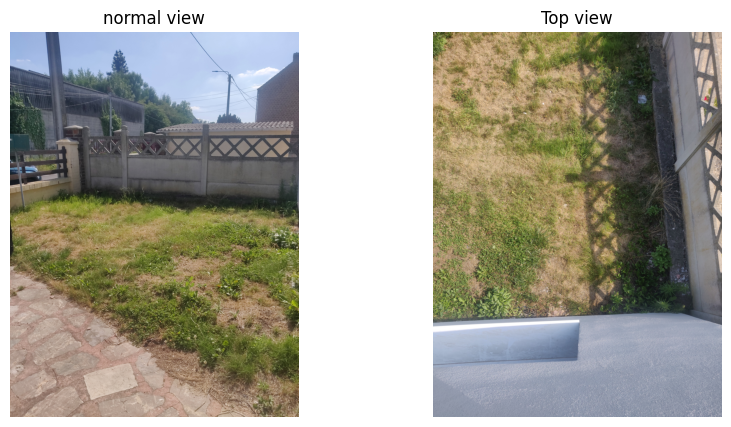

In [3]:
normal_view_2 = Image.open('../../data/IMG_20250711_163748.jpg')
normal_view_2 = normal_view_2.rotate(-90, expand=True)

top_image_view_2 = Image.open('../../data/IMG_20250711_163553.jpg')
top_image_view_2 = top_image_view_2.rotate(-90, expand=True)

# Create side-by-side plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.imshow(normal_view_2)
plt.title("normal view")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(top_image_view_2)
plt.title("Top view")
plt.axis('off')
plt.show()

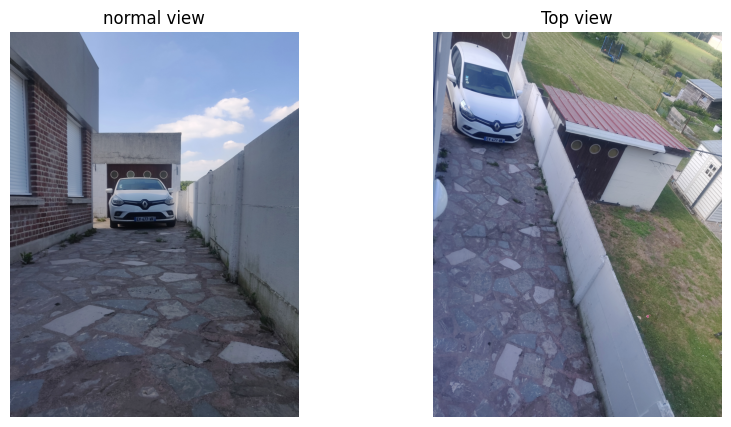

In [4]:
normal_view_3 = Image.open('../../data/IMG_20250711_163734.jpg')
normal_view_3 = normal_view_3.rotate(-90, expand=True)

top_image_view_3 = Image.open('../../data/IMG_20250711_163700.jpg')
top_image_view_3 = top_image_view_3.rotate(-90, expand=True)

# Create side-by-side plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.imshow(normal_view_3)
plt.title("normal view")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(top_image_view_3)
plt.title("Top view")
plt.axis('off')
plt.show()

In [5]:
MIN_MATCH_COUNT = 10

# Initialize sift detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(np.array(normal_view_3), None)
kp2, des2 = sift.detectAndCompute(np.array(top_image_view_3), None)

print(f"matches' Type : {type(kp1)}")
if isinstance(kp1, (list, tuple)):
    print(f"Number of keypoints in normal view: {len(kp1)}")
    print(f"Number of keypoints in top view: {len(kp2)}")

elif isinstance(kp1, np.ndarray):
    print(f"Number of keypoints in normal view: {kp1.shape[0]}")
    print(f"Number of keypoints in top view: {kp2.shape[0]}")

if isinstance(des1, (list, tuple)):
    print(f"Number of keypoints in normal view: {len(des1)}")
elif isinstance(des1, np.ndarray):
    print(f"Number of keypoints in normal view: {des1.shape}")
    print(f"Number of keypoints in top view: {des2.shape}")

matches' Type : <class 'tuple'>
Number of keypoints in normal view: 6585
Number of keypoints in top view: 28138
Number of keypoints in normal view: (6585, 128)
Number of keypoints in top view: (28138, 128)


In [10]:
# Initialize sift detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1_orb, des1_orb = orb.detectAndCompute(np.array(normal_view_3), None)
kp2_orb, des2_orb = orb.detectAndCompute(np.array(top_image_view_3), None)

print(f"matches' Type : {type(kp1_orb)}")
if isinstance(kp1_orb, (list, tuple)):
    print(f"Number of keypoints in normal view: {len(kp1_orb)}")
    print(f"Number of keypoints in top view: {len(kp2_orb)}")

elif isinstance(kp1_orb, np.ndarray):
    print(f"Number of keypoints in normal view: {kp1_orb.shape[0]}")
    print(f"Number of keypoints in top view: {kp2_orb.shape[0]}")

if isinstance(des1_orb, (list, tuple)):
    print(f"Number of keypoints in normal view: {len(des1_orb)}")
elif isinstance(des1_orb, np.ndarray):
    print(f"des1_orb descripeur shape: {des1_orb.shape}")
    print(f"des2_orb descripeur shape: {des2_orb.shape}")

matches' Type : <class 'tuple'>
Number of keypoints in normal view: 500
Number of keypoints in top view: 500
des1_orb descripeur shape: (500, 32)
des2_orb descripeur shape: (500, 32)


In [8]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1  
index_params  = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks = 50)  # or pass empty dictionary
print(f"SEARCH PARMS: {search_params}")

flann = cv2.FlannBasedMatcher(index_params, search_params)  
matches = flann.knnMatch(des1, des2, k=2)

if isinstance( matches, (list, tuple) ):
    print(f"number of matches found as tuple or list: {len(matches)}")
elif isinstance(matches, np.ndarray):
    print(f"number of matches found: {matches.shape}")

SEARCH PARMS: {'checks': 50}
number of matches found as tuple or list: 6585


In [9]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1  
index_params  = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks = 50)  # or pass empty dictionary
print(f"SEARCH PARMS: {search_params}")

flann = cv2.FlannBasedMatcher(index_params, search_params)  
matches_orb = flann.knnMatch(des1_orb   , des2_orb, k=2)

if isinstance( matches_orb, (list, tuple) ):
    print(f"number of matches found as tuple or list: {len(matches_orb)}")
elif isinstance(matches_orb, np.ndarray):
    print(f"number of matches found: {matches_orb.shape}")

SEARCH PARMS: {'checks': 50}


error: OpenCV(4.11.0) /io/opencv/modules/flann/src/miniflann.cpp:336: error: (-210:Unsupported format or combination of formats) in function 'buildIndex_'
> type=0
> 

In [8]:
# store all the good matches as per Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

print(f"Number of good matches : {len(good_matches)}")

Number of good matches : 106


In [9]:
if len(good_matches) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Find homography
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    print(f"Homography matrix: \n{M}")

    h, w = normal_view_3.size
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)
else:
    print( "Not enough matches are found {}/{}".format( len(good_matches), MIN_MATCH_COUNT) ) 
    matchesMask = None
    dst = None

Homography matrix: 
[[ 6.25674143e+00  3.71198872e-01 -6.07356260e+03]
 [ 1.53057392e+00  7.66975362e+00 -1.10888190e+04]
 [ 6.00175600e-04  1.98906764e-03  1.00000000e+00]]


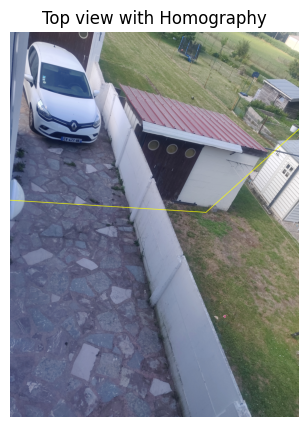

In [9]:
top_image_view_poly = cv2.polylines(np.array(top_image_view_3), [np.int32(dst)], True, (255, 255, 0), 5, cv2.LINE_AA)
plt.figure(figsize=(10, 5))
plt.imshow(top_image_view_poly)
plt.title("Top view with Homography")
plt.axis('off')
plt.show()

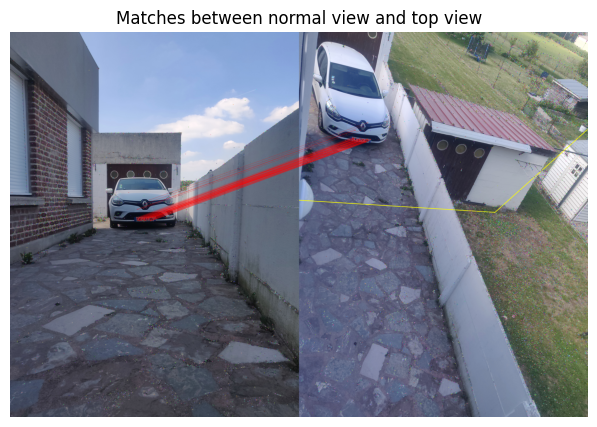

In [10]:
draw_params = dict(matchColor=(255, 0, 0), 
                   singlePointColor=None, 
                   matchesMask=matchesMask, 
                   flags=0)

image_draw = cv2.drawMatches(np.array(normal_view_3), kp1, np.array(top_image_view_poly), kp2, good_matches, None, **draw_params)

plt.figure(figsize=(10, 5))
plt.imshow(image_draw)
plt.title("Matches between normal view and top view")
plt.axis('off')
plt.show()  

In [ ]:
print(type(np.array(normal_view_3)))

print(f"Type of top_image_view_3: {type( top_image_view_poly)}")

print(f"Type of top_image_view_3: {type(kp1)}")

print(f"Type of good_matches: {type( good_matches)}")

print(f"matches len {len(good_matches)}")

<class 'numpy.ndarray'>
Type of top_image_view_3: <class 'numpy.ndarray'>
Type of top_image_view_3: <class 'tuple'>
Type of good_matches: <class 'list'>
matches len 106


In [ ]:
# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]
    else:
        matchesMask[i] = [0, 0]     

draw_params_knn = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask,
                     flags = cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS #0
                    )

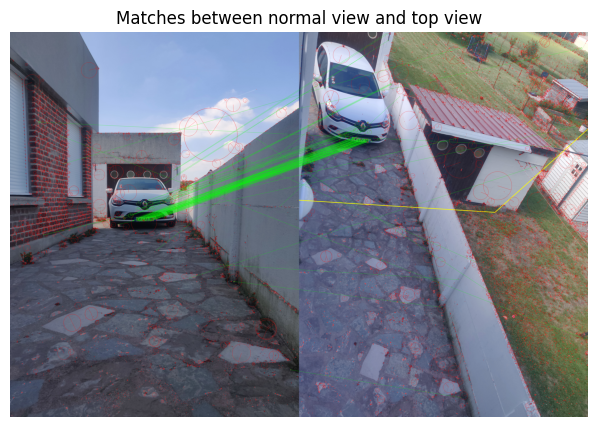

In [18]:
#img3 = cv2.drawMatchesKnn(np.array(normal_view), kp1, np.array(top_image_view), kp2, matches, None, **draw_params)
#cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS DrawMatchesFlags_DEFAULT
image_draw3 = cv2.drawMatchesKnn(np.array(normal_view_3), list(kp1), top_image_view_poly, list(kp2), matches, None, **draw_params_knn)

plt.figure(figsize=(10, 5))
plt.imshow(image_draw3)
plt.title("Matches between normal view and top view")
plt.axis('off')
plt.show()

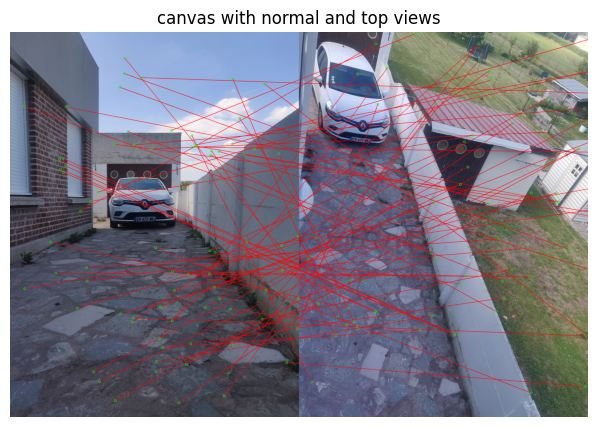

In [56]:
def draw_matches(image1, kp1, image2, kp2, good_matches, mask=None):
    """
    Draws matches between two images.
    
    Parameters:
    - image1: First image.
    - kp1: Keypoints in the first image.
    - image2: Second image.
    - kp2: Keypoints in the second image.
    - matches: Matches between the keypoints.
    - mask: Optional mask to filter matches.
    
    Returns:
    - Image with matches drawn.
    """
    h1, w1 = image1.shape[:2]
    h2, w2 = image2.shape[:2]


    canvas = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8)
    canvas[:h1, :w1] = np.array(image1)
    canvas[:h2, w1:w1 + w2] = np.array(image2)

    for m in good_matches:
        #m = m[0]  # unwrap match from list
        pt1 = tuple(np.round(kp1[m.queryIdx].pt).astype(int))
        pt2 = tuple(np.round(kp2[m.trainIdx].pt).astype(int))
        pt2 = (pt2[0] + w1, pt2[1])      # Shift second point for canvas

        # Draw thick lines and circles
        cv2.line(canvas, pt1, pt2, (255, 0, 0), thickness=3)  # Line
        cv2.circle(canvas, pt1, radius=12, color=(0, 255, 0), thickness=4)  # Filled circle
        cv2.circle(canvas, pt2, radius=12, color=(0, 255, 0), thickness=4)


    return canvas

canvas = draw_matches(np.array(normal_view_3), kp1, np.array(top_image_view_3), kp2, good_matches, mask=matchesMask)

plt.figure(figsize=(10, 5))
plt.imshow(canvas)
plt.title("canvas with normal and top views")
plt.axis('off')
plt.show()

In [54]:
normal_view_3_array = np.array(normal_view_3)
top_image_view_3_array = np.array(top_image_view_3)

print(f"Normal_view_3_array shape: {normal_view_3_array.shape}")
print(f"To_image_view_3_array: {top_image_view_3_array.shape}")

Normal_view_3_array shape: (4352, 3264, 3)
To_image_view_3_array: (4352, 3264, 3)


In [62]:
h1, w1 = normal_view_3_array.shape[:2]
h2, w2 = top_image_view_3_array.shape[:2]
canvas = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8)

canvas[:h1, :w1] = cv2.cvtColor(normal_view_3_array) #, cv2.COLOR_GRAY2BGR

canvas[:h2, w1:w1 + w2] = cv2.cvtColor( top_image_view_3_array) #, cv2.COLOR_GRAY2BGR

error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - cvtColor() missing required argument 'code' (pos 2)
>  - cvtColor() missing required argument 'code' (pos 2)


In [61]:
print(h1, w1)

canvas[:h1, :w1].shape

4352 3264


(4352, 3264, 3)

In [23]:
# find the keypoints and descriptors with SIFT
kp1_2, des1_2 = sift.detectAndCompute(np.array(normal_view), None)
kp2_2, des2_2 = sift.detectAndCompute(np.array(top_image_view), None)

print(f"Number of keypoints in normal view: {len(kp1_2)}")
print(f"Number of keypoints in top view: {len(kp2_2)}")

print(f"Number of keypoints in normal view: {des1_2.shape}")
print(f"Number of keypoints in top view: {des2_2.shape}")

Number of keypoints in normal view: 126086
Number of keypoints in top view: 211917
Number of keypoints in normal view: (126086, 128)
Number of keypoints in top view: (211917, 128)


In [24]:
# FLANN parameters
FLANN_INDEX_KDTREE_2 = 2  
index_params_2  = dict(algorithm=FLANN_INDEX_KDTREE_2, trees=5)
search_params_2 = dict(checks = 50)  # or pass empty dictionary
print(f"SEARCH PARMS: {search_params_2}")

flann_2 = cv2.FlannBasedMatcher(index_params_2, search_params_2)  
matches_2 = flann.knnMatch(des1_2, des2_2, k=2)

if isinstance( matches_2, (list, tuple) ):
    print(f"number of matches found as tuple or list: {len(matches_2)}")
elif isinstance(matches_2, np.ndarray):
    print(f"number of matches found: {matches_2.shape}")

SEARCH PARMS: {'checks': 50}
number of matches found as tuple or list: 126086


Number of good matches : 84
Homography matrix: 
[[-6.81695935e-01 -1.76799513e-02  1.76545178e+03]
 [-1.35716137e+00 -3.55058222e-02  3.45383542e+03]
 [-3.91431797e-04 -6.04808337e-06  1.00000000e+00]]


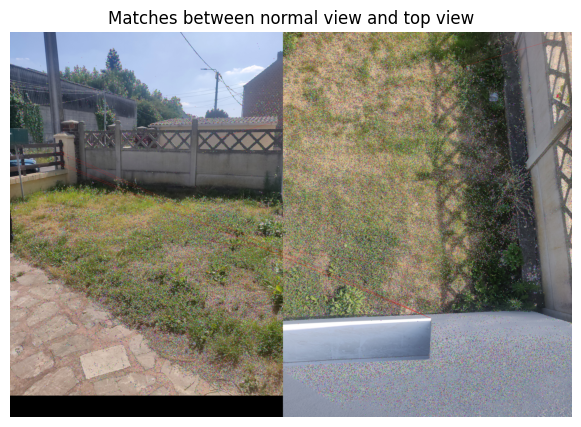

In [ ]:
# store all the good matches as per Lowe's ratio test
good_matches_2 = []
for m, n in matches_2:
    if m.distance < 0.7 * n.distance:
        good_matches_2.append(m)

print(f"Number of good matches : {len(good_matches_2)}")
if len(good_matches_2) > MIN_MATCH_COUNT:
    src_pts_2 = np.float32([kp1_2[m.queryIdx].pt for m in good_matches_2]).reshape(-1, 1, 2)
    dst_pts_2 = np.float32([kp2_2[m.trainIdx].pt for m in good_matches_2]).reshape(-1, 1, 2)

    # Find homography
    M_2, mask_2 = cv2.findHomography(src_pts_2, dst_pts_2, cv2.RANSAC, 5.0)
    matchesMask_2 = mask_2.ravel().tolist()

    print(f"Homography matrix: \n{M_2}")

    h, w = normal_view.size
    pts_2 = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst_2 = cv2.perspectiveTransform(pts_2, M_2)

draw_params_2 = dict(matchColor=(255, 0, 0), 
                   singlePointColor=None, 
                   matchesMask=matchesMask_2, 
                   flags=0) #drawMatchesKnn

image_draw_2 = cv2.drawMatches(np.array(normal_view), kp1_2, np.array(top_image_view), kp2_2, good_matches_2, None, **draw_params_2)
#image_draw_2 = cv2.drawMatchesKnn(np.array(normal_view), kp1_2, np.array(top_image_view), kp2_2, good_matches_2, None, **draw_params_2)

plt.figure(figsize=(10, 5))
plt.imshow(image_draw_2)
plt.title("Matches between normal view and top view")
plt.axis('off')
plt.show()  

In [36]:
# Need to draw only good matches, so create a mask
matchesMask_2_knn = [[0, 0] for i in range(len(matches_2))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches_2):
    if m.distance < 0.9 * n.distance:
        matchesMask_2_knn[i] = [1, 0]
    else:
        matchesMask_2_knn[i] = [0, 0]     

draw_params_knn_2 = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask_2_knn,
                     flags = cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS #0
                    )

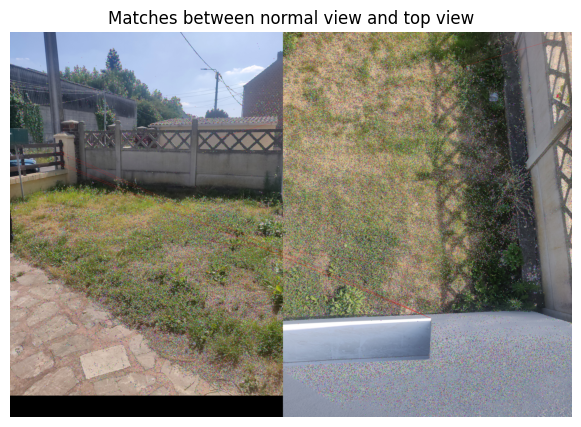

In [37]:
image_draw_2_knn = cv2.drawMatchesKnn(np.array(normal_view), kp1_2, np.array(top_image_view), kp2_2, matches_2, None, **draw_params_knn_2)

plt.figure(figsize=(10, 5))
plt.imshow(image_draw_2)
plt.title("Matches between normal view and top view")
plt.axis('off')
plt.show() 

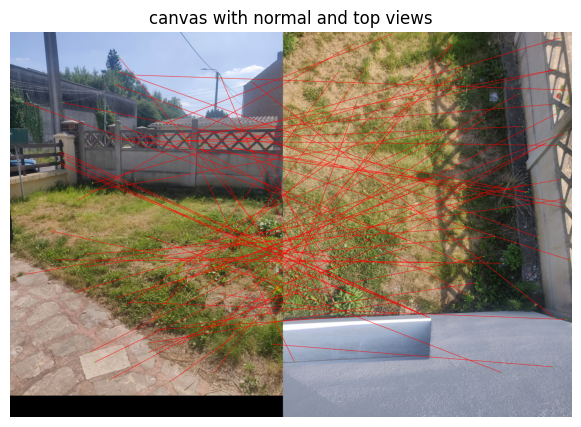

In [50]:
def draw_matches(image1, kp1, image2, kp2, good_matches, mask=None):
    """
    Draws matches between two images.
    
    Parameters:
    - image1: First image.
    - kp1: Keypoints in the first image.
    - image2: Second image.
    - kp2: Keypoints in the second image.
    - matches: Matches between the keypoints.
    - mask: Optional mask to filter matches.
    
    Returns:
    - Image with matches drawn.
    """
    h1, w1 = image1.shape[:2]
    h2, w2 = image2.shape[:2]


    canvas = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8)
    canvas[:h1, :w1] = np.array(image1)
    canvas[:h2, w1:w1 + w2] = np.array(image2)

    for m in good_matches:
        #m = m[0]  # unwrap match from list
        pt1 = tuple(np.round(kp1[m.queryIdx].pt).astype(int))
        pt2 = tuple(np.round(kp2[m.trainIdx].pt).astype(int))
        pt2 = (pt2[0] + w1, pt2[1])      # Shift second point for canvas

        # Draw thick lines and circles
        cv2.line(canvas, pt1, pt2, (255, 0, 0), thickness=3)  # Line
        cv2.circle(canvas, pt1, radius=6, color=(0, 255, 0), thickness=-1)  # Filled circle
        cv2.circle(canvas, pt2, radius=6, color=(0, 255, 0), thickness=-1)


    return canvas

canvas = draw_matches(np.array(normal_view), kp1, np.array(top_image_view), kp2, good_matches, mask=matchesMask)
plt.figure(figsize=(10, 5))
plt.imshow(canvas)
plt.title("canvas with normal and top views")
plt.axis('off')
plt.show()

In [48]:
good_matches_2[:2]  # Display first two matches for verification

[< cv2.DMatch 0x750870e74f10>, < cv2.DMatch 0x750870e76510>]

In [ ]:
#img3 = cv2.drawMatchesKnn(np.array(normal_view), kp1, np.array(top_image_view), kp2, matches, None, **draw_params)
#cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS DrawMatchesFlags_DEFAULT
image_draw = cv2.drawMatchesKnn(np.array(normal_view), list(kp1_2), np.array(top_image_view), list(kp2_2), matches_2, None, **draw_params_knn)

plt.figure(figsize=(10, 5))
plt.imshow(image_draw3)
plt.title("Matches between normal view and top view")
plt.axis('off')
plt.show()

In [ ]:
# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]
    else:
        matchesMask[i] = [0, 0]     

draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask, flags=0)
img3 = cv2.drawMatchesKnn(np.array(normal_view), kp1, np.array(top_image_view), kp2, matches, None, **draw_params)

plt.figure(figsize=(10, 5))
plt.imshow(img3)
plt.title("Matches between normal and top view")
plt.axis('off')
plt.show()      

# Find homography
if len(kp1) >= MIN_MATCH_COUNT and len(kp2) >= MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches if m.distance < 0.7 * n.distance]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches if m.distance < 0.7 * n.distance]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
else:
    print("Not enough matches are found - {}/{}".format(len(kp1), len(kp2)))
    matchesMask = None  
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask, flags=0)
img4 = cv2.drawMatchesKnn(np.array(normal_view), kp1, np.array(top_image_view), kp2, matches, None, **draw_params)
plt.figure(figsize=(10, 5))
plt.imshow(img4)
plt.title("Matches with Homography")
plt.axis('off')
plt.show()  
# Apply homography to top view
if M is not None:
    h, w = np.array(normal_view).shape[:2]
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)

    top_image_warped = cv2.polylines(np.array(top_image_view), [np.int32(dst)], True, (255, 0, 0), 3, cv2.LINE_AA)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(top_image_warped)
    plt.title("Warped Top View")
    plt.axis('off')
    plt.show()
# Apply homography to normal view
if M is not None:       
    h, w = np.array(top_image_view).shape[:2]
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)

    normal_view_warped = cv2.polylines(np.array(normal_view), [np.int32(dst)], True, (255, 0, 0), 3, cv2.LINE_AA)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(normal_view_warped)
    plt.title("Warped Normal View")
    plt.axis('off')
    plt.show()  
    